In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris_data = iris.data

In [8]:
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [9]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

In [12]:
iris_df['label'] = iris.target

In [13]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

In [15]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [16]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [17]:
pred = dt_clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


1. 데이터 세트 분리 : 일반적으로 skleran.model_selection 의 train_test_split을 이용
2. 모델 학습 : 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습시킴
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. 평가 : 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가

일반적으로 `머신러닝 모델을 구축하는 주요 프로세스는`  
* 피처의 가공, 변경, 추출을 수행하는 피처 처리,
* ML 알고리즘 학습/예측 수행  
* 모델 평가의 단계 수행  


위를 반복적으로 하는것.  
sklearn 은 이런점에서 편리성, 다양성, 유연성을 지니고있음

#### sklearn datasets
sklearn datasets 모듈에는 다양한 API가 있다..  
boston, breast cancer, diabtes iris digits 등등..  
fetch 계열의 명령은 데이터 크기가 커서 패키지에 저장되어있지 않고 인터넷에서 내려 받을수 있게끔 하는것들이다.  

make_classifications()  
make_blobs()  
등 분류를 위한, 클러스터링을 위한 랜덤한 샘플을 생성해주는 것들도 있다.  

보통 datasets는 data, target, target_name, feature_names, DESCR로 구성되어있다.  



### Model Selection 모듈

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=11)
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print("예측 정확도:", accuracy_score(train_label, pred))

예측 정확도: 1.0


예측 정확도가 1인 경우는 train으로 학습시켰는데 train 으로 predict했기때문!

In [29]:
dt_clf = DecisionTreeClassifier(random_state=12)
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=12)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#### K-Fold 교차검증 

In [30]:
from sklearn.model_selection import KFold

In [31]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5)
cv_accuracy = []
print("iris 데이터 셋 크기:", features.shape)

iris 데이터 셋 크기: (150, 4)


In [43]:
type(kfold.split(features))

generator

In [44]:
next(kfold.split(features))

(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [49]:
n_iter = 0
cv_accuracy = []


#KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)


#1 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.8, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


In [50]:
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


## 평균 검증 정확도: 0.91332


####  Stratified K-Fold
imbalanced label(class)을 위한 K fold 방식

In [65]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

iris데이터는 label이 3가지.. 50개씩으로 총 150개의 데이터이다. 이데이터를 3-fold하면?

In [67]:
kfold = KFold(3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(' ## 교차검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

 ## 교차검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
 ## 교차검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
 ## 교차검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


위와 같이 전혀 다른 label들의 데이터를 학습 시킬 수 없음!
#### StratifedKFold 를 이용하면 이를 해결 가능! - 각 레이블의 분포에따라 학습/검증 데이터를 나누어준다!

In [70]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    16
1    16
0    16
Name: label, dtype: int64


위와같이 데이터가 고루 분포 됨을 알 수 있다.  
그럼 StratifiedKFold 를 이용해서 분류를 해보자

In [72]:
dt_clf = DecisionTreeClassifier(random_state=42)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

#StratifiedKFold 의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}".format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n교차 검증별 정확도:', np.round(cv_accuracy,4 ))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.9804, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

#2 교차 검증 정확도 : 0.9216, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

#3 교차 검증 정확도 : 0.9792, 학습 데이터 크기 : 102, 검증 데이터 크기 : 48
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

교차 검증별 정확도: [0.9804 0.9216 0.9792]
## 평균 검증 정확도: 0.9604


#### cross_val_score() - 교차검증을 편안하게 해주는 도구

cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs)

내부적으로 StratifiedKFold 를 사용해줌

In [102]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

data = iris.data
label = iris.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ' , np.round(scores,4))
print('평균 검증 정확도 : ' , np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.9804 0.9216 0.9792]
평균 검증 정확도 :  0.9604


cross_validate() 라는 비슷한 API가 존재.  
여러개의 평가지표를 반환할 수 있음

In [109]:
scores_2 = cross_validate(dt_clf, data, label, return_train_score=True, scoring=('accuracy'), verbose=1, cv=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [110]:
scores_2

{'fit_time': array([0.00099707, 0.00136614, 0.0009973 ]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([0.98039216, 0.92156863, 0.97916667]),
 'train_score': array([1., 1., 1.])}

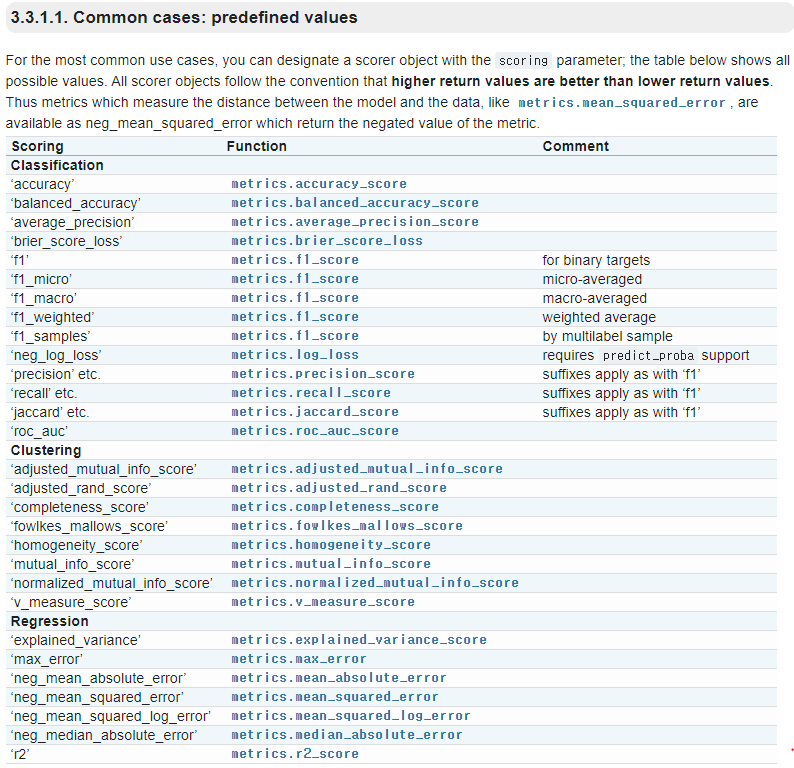

### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 
아래처럼 dictionary 형태로 만들어주자  
그냥 for루프를 좀더 유연하게 제공해주는거임.. 사실 특별한건아니네

In [112]:
grid_parameters = {'max_depth':[1,2,3],
                  'min_samples_split':[2,3]
                  }

In [115]:
from sklearn.model_selection import GridSearchCV

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state = 11)

dtree = DecisionTreeClassifier()

##parameter 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

##refit = True : 최적의 하이퍼파라미터 찾은 뒤 해당 파라미터로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit =True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_) ##cv_results는 gridserachcv의 결과 세트로서 딕셔너리 형태
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split1_test_score', 'split2_test_score']]##원하는것만 잘보기위해서 원하는 순서대로 뽑아내자

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.682927,0.675,0.675,0.666667
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.682927,0.675,0.675,0.666667
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.926829,1.000,1.000,0.948718
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.926829,1.000,1.000,0.948718
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.926829,1.000,1.000,0.974359
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.926829,1.000,1.000,0.974359


위의 칼럼 설명  
- params : 수행할때마다 하이퍼 파라미터 값
- rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score순위
- mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 수행한 평가 평균값

부가적으로 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때 결과값은 각각 .best_params, .best_score_ 에 기록된다.

In [118]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9667


## 데이터 전처리

sklearn 에서 NaN, Null은 허용되지않는다.  
또한 문자열을 입력 값으로 허용하지 않는다. 즉 숫자형으로 바꿔줘야한다. 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요할 경우 삭제하는 것이 좋다 

### 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식은 Label encoding과 one-hot encoding이 있다.  
Label encoding : 카테고리 피처를 코드형 숫자값으로 변환시키는것

#### 레이블 인코딩

In [122]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


몇몇 ML 알고리즘에서는 LabelEncoder를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문!  
이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지않으므로 LabelEncoder도 별 문제없다!


#### One-hot encoding
One-hot encoding은 사이킷런에서 쉽게 가능. 단, LabelEncoder와 다르게 주의할 점이있다.
1. OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것.
2. 입력 값으로 2차원 데이터가 필욯다는점.

In [124]:
from sklearn.preprocessing import OneHotEncoder
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
# 먼저 숫자값을 위해 LabelEncoder 수행

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
#2차원 데이터로 변환
labels = labels.reshape(-1,1)

#원 핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray())
print(oh_labels.shape)





[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


C:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


근데 이 one-hot encoding을 더 쉽게 수행하는 방법이 pandas 에 있다. get_dummies

In [128]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피쳐스케일링과 정규화

#### StandardScaler
평균이 0이고 분산이 1인 값으로 변환!  
정규분포가정이 들어가는 알고리즘들에서 상당히 중요하다!
* RBF kernel SVM
* Linear Regression
* Logistic Regression

In [130]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print('평균:')
print(iris_df.mean())
print('분산:')
print(iris_df.var())

평균:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
분산:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


#### MinMaxScaler
0과 1사이의 값으로 변환, 음수 값이 있을경우 -1에서 1사이의 값으로 변환.  
데이터의 분포가 가우시안이 아닐때 Min-Max로 변환해볼수있음.

In [133]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환 fit / transform
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic_df = pd.read_csv(r'C:\Users\정재훈\Desktop\파이썬 머신러닝 완벽 가이드\Data\titanic\train.csv', engine='python')

In [164]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [165]:
print('\n ###학습 데이터 정보 ### \n')
print(titanic_df.info())


 ###학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


RangeIndex : 전체 로우수를 알 수 있음.. 891  
Data columns : 전체 칼럼수 .. 12  
Row수가 891개가 안되는것들은 Na를 가지고있다는 증거!

In [166]:
print('칼럼 별 Na값 개수:\n',titanic_df.isna().sum())
print('\n총 Na값 개수 :', titanic_df.isna().sum().sum())

칼럼 별 Na값 개수:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

총 Na값 개수 : 866


In [167]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수:', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수: 0


In [168]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N                  687
B96 B98              4
G6                   4
C23 C25 C27          4
F33                  3
F2                   3
C22 C26              3
D                    3
E101                 3
F4                   2
B22                  2
D33                  2
E25                  2
C65                  2
F G73                2
D35                  2
C125                 2
C52                  2
E44                  2
E67                  2
B49                  2
D26                  2
B35                  2
B57 B59 B63 B66      2
E33                  2
C124                 2
E8                   2
B77                  2
C123                 2
B20                  2
                  ... 
D30                  1
B41                  1
E40                  1
C118                 1
E34                  1
E10                  1
C90                  1
C91                  1
C30                  

Cabin의 경우 앞 문자만 추출하자.

In [169]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [170]:
titanic_df['Cabin']

0      N
1      C
2      N
3      C
4      N
5      N
6      E
7      N
8      N
9      N
10     G
11     C
12     N
13     N
14     N
15     N
16     N
17     N
18     N
19     N
20     N
21     D
22     N
23     A
24     N
25     N
26     N
27     C
28     N
29     N
      ..
861    N
862    D
863    N
864    N
865    N
866    N
867    A
868    N
869    N
870    N
871    D
872    B
873    N
874    N
875    N
876    N
877    N
878    N
879    C
880    N
881    N
882    N
883    N
884    N
885    N
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [171]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

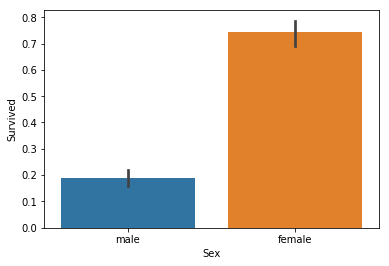

In [172]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

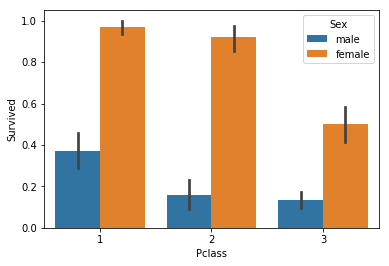

In [173]:
sns.barplot(x='Pclass',y='Survived', hue = 'Sex', data=titanic_df)

age는 값이 너무 많기떄문에 categorical 하게 바꿔주자

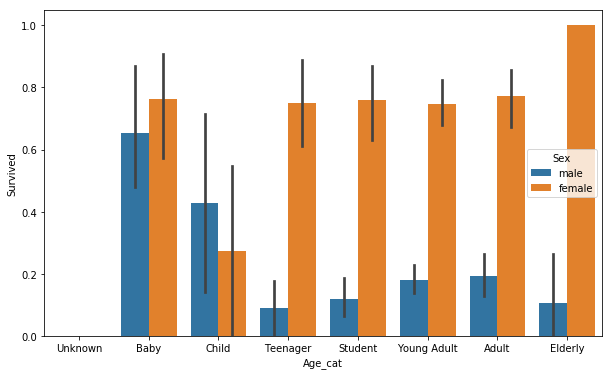

In [174]:
def get_category(age):
    cat=''
    if age<=-1 : cat = 'Unknown'
    elif age<=5: cat = 'Baby'
    elif age<=12: cat = 'Child'
    elif age<=18: cat = 'Teenager'
    elif age<=25: cat = 'Student'
    elif age<=35: cat = 'Young Adult'
    elif age<=60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

#막대그래프 크기 설정
plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult' ,'Elderly']

#lambda 식 활용

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data = titanic_df, order = group_names)
#titanic_df.drop('Age_cat', axis=1, inplace = True)

대충 Sex, Age, PClass 등이 중요한 피처임을 알 수 있음

이제 남아있는 문자열 카테고리 피처를 숫자형으로 변환하자. (LabelEncoder)  
함수를 하나 생성해서 하자

In [176]:
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


Sex, Cabin, Embarked가 숫자형으로 인코딩된걸 확인할 수 있음

지금까지 한것들 함수로 다 정리해버리자

In [180]:
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

#drop
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
    return df

#encoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

그럼 다시불러와서 한번에 전처리하고 label과 feature을 분리 해보자

In [182]:
titanic_df = pd.read_csv(r'C:\Users\정재훈\Desktop\파이썬 머신러닝 완벽 가이드\Data\titanic\train.csv', engine='python')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

train과 test분리

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

머신러닝 알고리즘 적용

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RaodomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RaodomForestClassifier 정확도 : 0.8436
LogisticRegression 정확도 : 0.8659


C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic이 높은 정확도를 보이기는 하지만 최적화가 안된상태라 신뢰는 못함 parameter수정해봐야함

In [188]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
        
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7753
교차검증 4 정확도: 0.8202
평균 정확도 : 0.7823


교차검증을 위와같이 for문을 이용해 함수 정의해서 했는데 cross_val_score로 간단하게 가능하다  
StratifiedKfold 기반이기때문에 결과가 약간다름

In [190]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7877
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7921
교차 검증 4 정확도 : 0.8249
평균 정확도 : 0.7868


이제 DecisionTree에서 GridSearch를 이용해서 최적의 하이퍼 파라미터(max_depth, min_samples_split, min_samples_leaf)를 찾아서 성능 측정

In [192]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 ; {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSerachCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 ; 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


테스트용 데이터 세트가 작기때문에 수치상으로 예측성능이많이 증가한것 처럼 보임